In [0]:
# Import the machine learning libraries.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

Using TensorFlow backend.


In [0]:
data = []
labels = []
classes = 43
cur_path = '/content/drive/My Drive/ML_Code/Traffic Signs Recognition'

In [0]:
# Retrieve the images and their labels.
for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    print(i)
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/' + a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42


In [0]:
# Convert lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [0]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [0]:
# Split the dataset into the training set and test subsets.
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [0]:
# Convert the labels into one-hot encoding.
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [0]:
# Build the model.
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [0]:
# Compile the model.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Train on 31367 samples, validate on 7842 samples
Epoch 1/15
31367/31367 [==============================] - 134s 4ms/step - loss: 1.7849 - accuracy: 0.5576 - val_loss: 0.4219 - val_accuracy: 0.8930
Epoch 2/15
31367/31367 [==============================] - 133s 4ms/step - loss: 0.5905 - accuracy: 0.8322 - val_loss: 0.1654 - val_accuracy: 0.9596
Epoch 3/15
31367/31367 [==============================] - 132s 4ms/step - loss: 0.4400 - accuracy: 0.8727 - val_loss: 0.1288 - val_accuracy: 0.9674
Epoch 4/15
31367/31367 [==============================] - 136s 4ms/step - loss: 0.3452 - accuracy: 0.9028 - val_loss: 0.0736 - val_accuracy: 0.9814
Epoch 5/15
31367/31367 [==============================] - 132s 4ms/step - loss: 0.2953 - accuracy: 0.9162 - val_loss: 0.1040 - val_accuracy: 0.9727
Epoch 6/15
31367/31367 [==============================] - 132s 4ms/step - loss: 0.2939 - accuracy: 0.9192 - val_loss: 0.0636 - val_accuracy: 0.9818
Epoch 7/15
31367/31367 [==============================] - 132s 

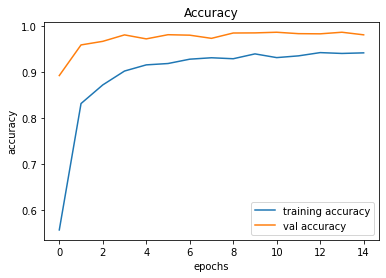

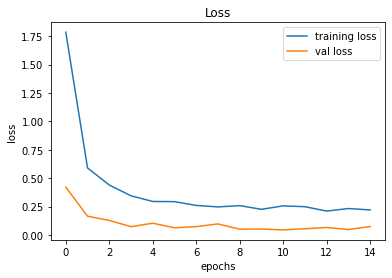

In [0]:
# Plot graphs for accuracy.
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
y_test = pd.read_csv(cur_path + '/' + 'Test.csv')

In [0]:
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

In [0]:
data=[]
for img in imgs:
    image = Image.open(cur_path + '/' + img)
    image = image.resize((30,30))
    data.append(np.array(image))

In [0]:
X_test = np.array(data)
print(X_test.shape)

(12630, 30, 30, 3)


In [0]:
pred = model.predict_classes(X_test)

In [0]:
from sklearn.metrics import accuracy_score
# Print accuracy.
print("Accuracy:", accuracy_score(labels, pred), "\n")

Accuracy: 0.9403800475059383 



In [0]:
model.save(cur_path + '/' +'traffic_signs_classifier.h5')